In [1]:
import pandas as pd
import json
import os
import glob
import numpy as np
from plotnine import *
from scipy.stats import uniform
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import math
import re
import json
import html
import math
import shutil
import copy

In [2]:
df = pd.read_csv('Mangas.csv', encoding="utf8")
df2 = pd.read_csv('Author.csv')
df = pd.merge(df, df2, on='title')

In [13]:
df = df.drop_duplicates(subset=["title", "description"], keep="first")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15489 entries, 0 to 15488
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0_x       15489 non-null  int64  
 1   id_x               15489 non-null  int64  
 2   title              15489 non-null  object 
 3   url                15489 non-null  object 
 4   description        14835 non-null  object 
 5   count_chapters     15489 non-null  int64  
 6   rating             15489 non-null  float64
 7   demographic        11996 non-null  object 
 8   format             15489 non-null  object 
 9   genre              15489 non-null  object 
 10  theme              15489 non-null  object 
 11  languages          15489 non-null  object 
 12  related            15489 non-null  object 
 13  matches            15489 non-null  object 
 14  matches_al         15489 non-null  object 
 15  external           15489 non-null  object 
 16  external_al        154

In [20]:
df.head()

,Unnamed: 0_x,id_x,title,url,description,count_chapters,rating,demographic,format,genre,...,Villainess,Unnamed: 80,Gore,Unnamed: 0_y,status,chapters,author,artist,filename,id_y
0,0,1,Tower of God,https://mangadex.org/manga/1,"Bam, who was alone all his life has entered th...",1907,8.85,Shounen,"['Award Winning', 'Long Strip', 'Web Comic', '...","['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",...,False,False,False,48192,hiatus,NaN,SIU,SIU,ff317e75-c2de-4fdd-a9ef-1687315abef1.jpg,c0ee660b-f9f2-45c3-8068-5123ff53f84a
1,2,3,The Bullet Saint,https://mangadex.org/manga/3,"1943 Manju. Kim Ui-ryong, known as the perfect...",3,7.87,NaN,[],"['Action', 'Adventure', 'Drama', 'Mystery']",...,False,False,False,18855,completed,34,유경원,문성호,16d85f62-4da9-4c6f-9d6c-d2c79044c846.jpg,4b9211d5-c33c-49e0-a0fc-5929992e0766
2,3,4,Beelzebub,https://mangadex.org/manga/4,Ishiyama High is a school populated entirely b...,1005,8.63,Shounen,[],"['Action', 'Comedy', 'Fantasy']",...,False,False,False,34706,completed,246,Tamura Ryuuhei,Tamura Ryuuhei,bab3ccbf-7479-4117-ad92-4dedced54ceb.jpg,8af3ad21-3e7e-4fb5-b344-d0044ec154fc
3,4,5,Naruto,https://mangadex.org/manga/5,"Before Naruto's birth, a great demon fox had a...",2156,8.00,Shounen,[],"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",...,False,False,False,26689,completed,700,Kishimoto Masashi,Kishimoto Masashi,bb223226-a5ca-457b-8a10-ad3ecaea66be.jpg,6b1eb93e-473a-4ab3-9922-1a66d2a29a4a
4,7,8,Psyren,https://mangadex.org/manga/8,Ageha Yoshina is a self-confident high school ...,439,8.54,Shounen,[],"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",...,False,False,False,54402,completed,145.5,Iwashiro Toshiaki,Iwashiro Toshiaki,1b688310-58ee-4187-8a3d-a950b21fa9bc.jpg,d97db976-eeec-4eb4-8868-346fbd7ed1e5


In [24]:
# Convert the classes
for i in ['genre', 'format', 'theme']:
    df[i] = df[i].apply(eval)

In [25]:
for i, l in enumerate(df['genre']):
 print('list',i,'is',type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [18]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [26]:
# genre value counts
to_1D(df['genre']).value_counts()

Romance          6708
Comedy           6325
Drama            5428
Action           3973
Fantasy          3814
Slice of Life    3708
Adventure        2393
Mystery          1599
Psychological    1395
Tragedy          1302
Historical       1133
Horror           1018
Sci-Fi            836
Isekai            520
Sports            511
Mecha             216
Thriller          196
Crime             157
Wuxia             110
Philosophical      93
Superhero          88
Medical            82
dtype: int64

In [27]:
# format value counts
to_1D(df['format']).value_counts()

Web Comic           2415
Long Strip          2384
Oneshot             2331
Full Color          2169
Adaptation           929
4-Koma               504
Official Colored     364
Anthology            361
Award Winning        284
Fan Colored           20
dtype: int64

In [28]:
# theme value counts
to_1D(df['theme']).value_counts()

School Life          3830
Supernatural         3300
Martial Arts          802
Magic                 606
Reincarnation         418
Monsters              391
Demons                297
Video Games           282
Animals               275
Time Travel           217
Cooking               209
Military              194
Music                 184
Survival              179
Office Workers        169
Vampires              158
Ghosts                152
Monster Girls         138
Post-Apocalyptic      125
Delinquents           121
Aliens                106
Villainess            100
Police                 86
Zombies                67
Mafia                  62
Virtual Reality        57
Samurai                55
Ninja                  35
Traditional Games      31
dtype: int64

In [29]:
df['demographic'].value_counts()

Shoujo     4268
Shounen    3475
Seinen     2845
Josei       938
Name: demographic, dtype: int64

In [4]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [30]:
df_1 = df["genre"].apply(pd.Series)
genres_list = []
for j in range(len(df)):
    for i in df_1[0].unique():
        if i not in genres_list:
            genres_list.append(i)
genres_list

C:\Users\Alhaz\AppData\Local\Temp\ipykernel_3876\911152344.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


['Action',
 'Comedy',
 'Fantasy',
 'Drama',
 'Adventure',
 'Romance',
 'Slice of Life',
 'Sports',
 'Mystery',
 'Historical',
 'Horror',
 'Psychological',
 nan,
 'Tragedy',
 'Sci-Fi',
 'Mecha',
 'Medical',
 'Thriller',
 'Philosophical',
 'Crime',
 'Wuxia',
 'Isekai']

In [31]:
df_1 = df["theme"].apply(pd.Series)
genres_list2 = []
for j in range(len(df)):
    for i in df_1[0].unique():
        if i not in genres_list2:
            genres_list2.append(i)
genres_list2

C:\Users\Alhaz\AppData\Local\Temp\ipykernel_3876\1790145611.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


[nan,
 'Supernatural',
 'Martial Arts',
 'School Life',
 'Cooking',
 'Traditional Games',
 'Music',
 'Delinquents',
 'Magic',
 'Post-Apocalyptic',
 'Survival',
 'Military',
 'Virtual Reality',
 'Police',
 'Ninja',
 'Aliens',
 'Demons',
 'Animals',
 'Video Games',
 'Samurai',
 'Time Travel',
 'Reincarnation',
 'Monsters',
 'Mafia',
 'Vampires',
 'Office Workers',
 'Monster Girls',
 'Zombies',
 'Ghosts',
 'Villainess']

In [32]:
df_1 = df["format"].apply(pd.Series)
genres_list3 = []
for j in range(len(df)):
    for i in df_1[0].unique():
        if i not in genres_list3:
            genres_list3.append(i)
genres_list3

C:\Users\Alhaz\AppData\Local\Temp\ipykernel_3876\415748427.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


['Award Winning',
 nan,
 'Long Strip',
 'Oneshot',
 '4-Koma',
 'Anthology',
 'Adaptation',
 'Full Color',
 'Web Comic',
 'Official Colored',
 'Fan Colored']

In [17]:
df_bool = boolean_df(df['genre'], genres_list)
df_bool1 = boolean_df(df['format'], genres_list3)
df_bool2 = boolean_df(df['theme'], genres_list2)


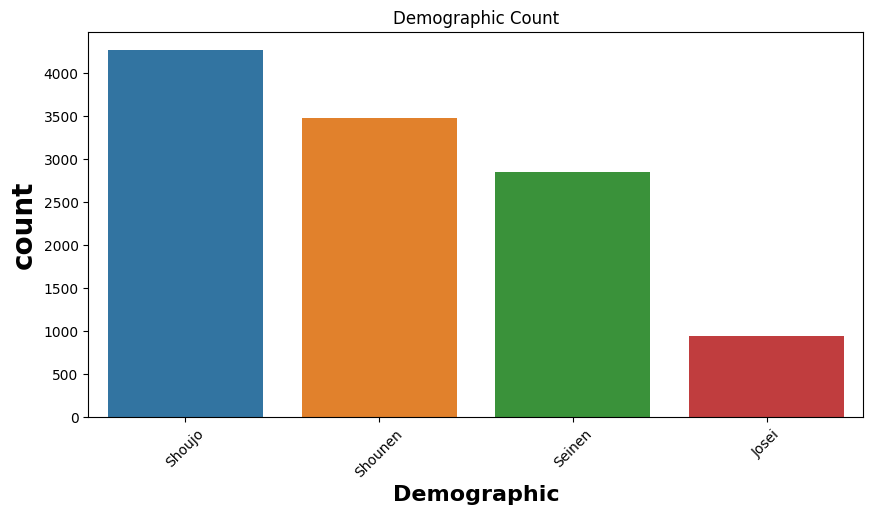

In [45]:
plt.subplots(figsize=(10,5))
sns.countplot(x="demographic", data=df, order = df['demographic'].value_counts().index)
plt.title("Demographic Count")#, weight="bold",fontsize=20, pad=20)
plt.ylabel("count", weight="bold", fontsize=20)
plt.xlabel("Demographic", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()


In [34]:
# Average rating for Shounen manga in the data
df[df['demographic'] == 'Shounen'].rating.mean()

7.810146762589929

In [35]:
# Average rating for Shoujo manga in the data
df[df['demographic'] == 'Shoujo'].rating.mean()

7.665110121836927

In [36]:
# Average rating for Seinen manga in the data
df[df['demographic'] == 'Seinen'].rating.mean()

7.92913181019332

In [37]:
# Average rating for Josei manga in the data
df[df['demographic'] == 'Josei'].rating.mean()

7.818144989339019

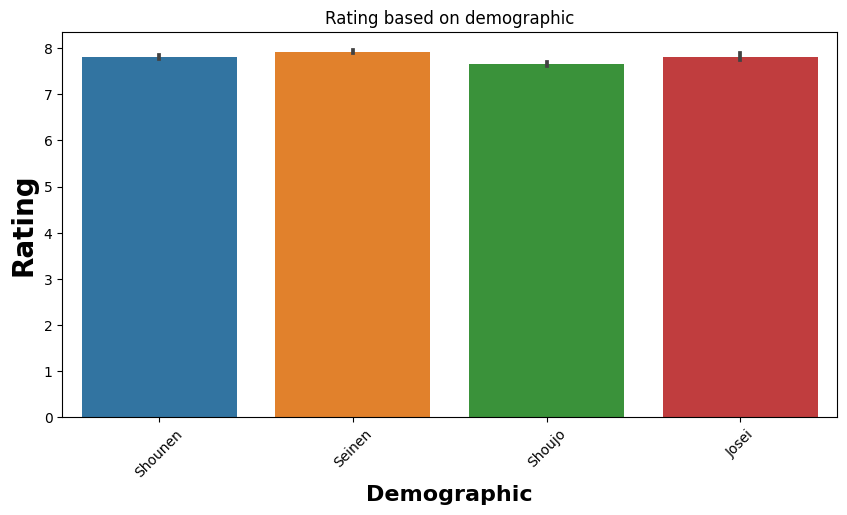

In [55]:
plt.subplots(figsize=(10,5))
sns.barplot(data=df, x = df['demographic'], y =df['rating'])
plt.title("Rating based on demographic")#, weight="bold",fontsize=20, pad=20)
plt.ylabel("Rating", weight="bold", fontsize=20)
plt.xlabel("Demographic", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()